In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 

from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from dbn.tensorflow import SupervisedDBNClassification

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
# Get Data from File
csv_filename = "qc aggregated data.csv"
df = pd.read_csv(csv_filename)

# Specify Input and Output from Data
input_columns = ["tempmax", "tempmin", "temp", "feelslikemax", "feelslikemin", "feelslike", "dew", "humidity", "windspeed"]
output_column = ["conditions"]
X = df[input_columns]
Y = df[output_column]

# Preprocess the data (Convert raw string conditions to numerical values, and split data)
X = X.to_numpy()
le = LabelEncoder()
Y = le.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
while (len(np.unique(Y_train)) != len(le.classes_)) or (len(np.unique(Y_test)) != len(le.classes_)):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Class mapping - used later for labelling
label_mapping = {x: y for x, y in zip(le.transform(le.classes_), le.classes_)}
lm = list(label_mapping.values())
lm = [x.replace(",", ",\n") for x in lm]



c:\Users\Alaric\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
len(np.unique(Y_test)), len(np.unique(Y_train))

(4, 4)

In [9]:
# Create the classifier
classifier = SupervisedDBNClassification(hidden_layers_structure=[256, 256],
                                         learning_rate_rbm=0.1,
                                         learning_rate=0.1,
                                         n_epochs_rbm=10,
                                         n_iter_backprop=10,
                                         batch_size=32,
                                         activation_function='relu',
                                         dropout_p=0)

# Train the classifier on the data
classifier.fit(X_train, Y_train)

[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 434210518053.410583
>> Epoch 2 finished 	RBM Reconstruction error 440678048050.875671
>> Epoch 3 finished 	RBM Reconstruction error 439246525335.878845
>> Epoch 4 finished 	RBM Reconstruction error 440597127897.368042
>> Epoch 5 finished 	RBM Reconstruction error 433570641595.140625
>> Epoch 6 finished 	RBM Reconstruction error 426949458925.243530
>> Epoch 7 finished 	RBM Reconstruction error 435337541796.997253
>> Epoch 8 finished 	RBM Reconstruction error 428148511321.165894
>> Epoch 9 finished 	RBM Reconstruction error 425248832334.521606
>> Epoch 10 finished 	RBM Reconstruction error 433086872367.288513
>> Epoch 1 finished 	RBM Reconstruction error 316935.375000
>> Epoch 2 finished 	RBM Reconstruction error 285924.968750
>> Epoch 3 finished 	RBM Reconstruction error 286297.125000
>> Epoch 4 finished 	RBM Reconstruction error 287087.312500
>> Epoch 5 finished 	RBM Reconstruction error 285924.437500
>> Epoch 6 f

SupervisedDBNClassification(batch_size=32, dropout_p=0,
                            idx_to_label_map={0: 1, 1: 3, 2: 2, 3: 0},
                            l2_regularization=1.0,
                            label_to_idx_map={0: 3, 1: 0, 2: 2, 3: 1},
                            learning_rate=0.1, n_iter_backprop=10,
                            verbose=True)

In [15]:
classifier.score(X_train, Y_train)

0.5969325153374233

# Results

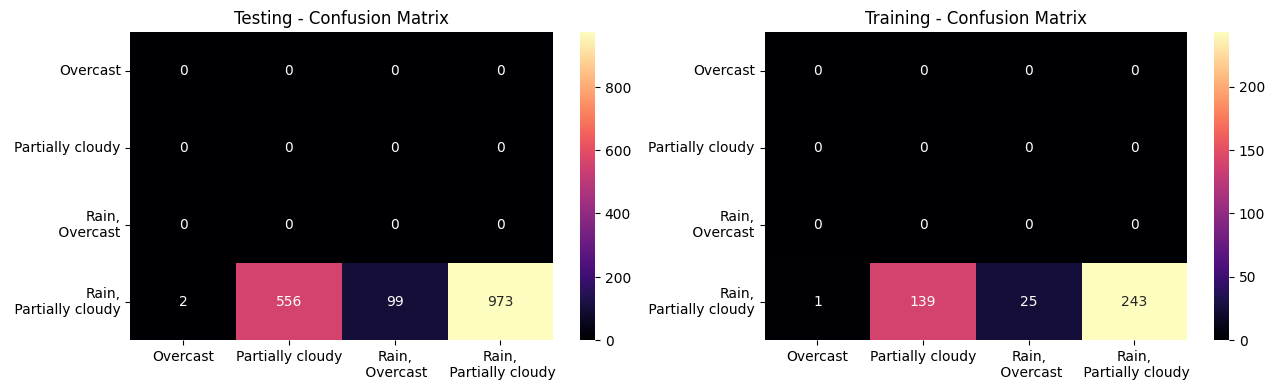

Testing: 0.5955882352941176 
Training: 0.5969325153374233


In [6]:
# Predict on training (for verification)
Y_pred_train = classifier.predict(X_train)
CM_train = confusion_matrix(Y_pred_train, Y_train)
train_acc = accuracy_score(Y_train, Y_pred_train)

# Testing Plot
plt.figure(figsize=(15, 4))
ax = plt.subplot(121)
ax.set_title("Testing - Confusion Matrix")
sns.heatmap(CM_train, annot=True, cmap="magma", ax=ax, fmt='d')
ax.xaxis.set_ticklabels(lm)
ax.yaxis.set_ticklabels(lm)
plt.yticks(rotation=0)

# Predict on testing (for verification)
Y_pred_test = classifier.predict(X_test)
CM_test = confusion_matrix(Y_pred_test, Y_test)
test_acc = accuracy_score(Y_test, Y_pred_test)

ax2 = plt.subplot(122)
ax2.set_title("Training - Confusion Matrix")
sns.heatmap(CM_test, annot=True, cmap="magma", ax=ax2, fmt='d')
ax2.xaxis.set_ticklabels(lm)
ax2.yaxis.set_ticklabels(lm)
plt.yticks(rotation=0)

plt.show()
print(f"Testing: {test_acc} \nTraining: {train_acc}")

In [7]:
np.unique(np.array(Y_pred_train)), np.unique(Y_train)

(array([3]), array([0, 1, 2, 3]))